# Name: Sumer Malhotra (3035347457)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Reading datasheets

In [2]:
df1 = pd.read_csv('HelocData1.csv')
df2 = pd.read_excel('HelocDataDict.xlsx')

## Calculating missing values for every feature and storing in list

In [3]:
missing = []
index = []
var = 'x'
for i in range(1, 24):
    temp = var + str(i)
    index.append(temp)
    counts = df1[temp].value_counts()
    sum = 0
    if -9 in counts:
        sum += counts[-9]
    if -8 in counts:
        sum += counts[-8]
    if -7 in counts:
        sum += counts[-7]
    missing.append(sum)

## Visualize result in a bar chart

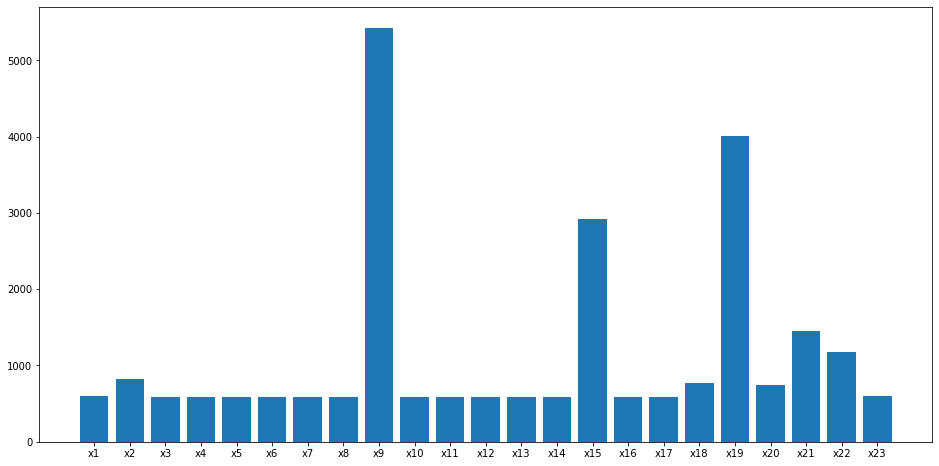

In [4]:
plt.figure(figsize=(16, 8))
plt.bar(index, missing);

## Setting UID as random seed, splitting data into training and test

In [5]:
np.random.seed(3035347457)
df_train,df_test = train_test_split(df1,test_size=0.2)

## Imputing missing values (-7, -8 , -9) by mean of column

In [6]:
warnings.filterwarnings("ignore")
for i in range(1, 24):
    index.append(i)
    temp = var + str(i)
    sum = 0
    count = 0
    for j in df_train[temp]:
        if j == -7 or j == -8 or j == -9:
            pass
        else:
            sum += j
            count += 1
    mean = sum/count
    df_train[temp] = df_train[temp].replace(-9, mean)
    df_train[temp] = df_train[temp].replace(-8, mean)
    df_train[temp] = df_train[temp].replace(-7, mean)

## Drawing boxplot for each feature

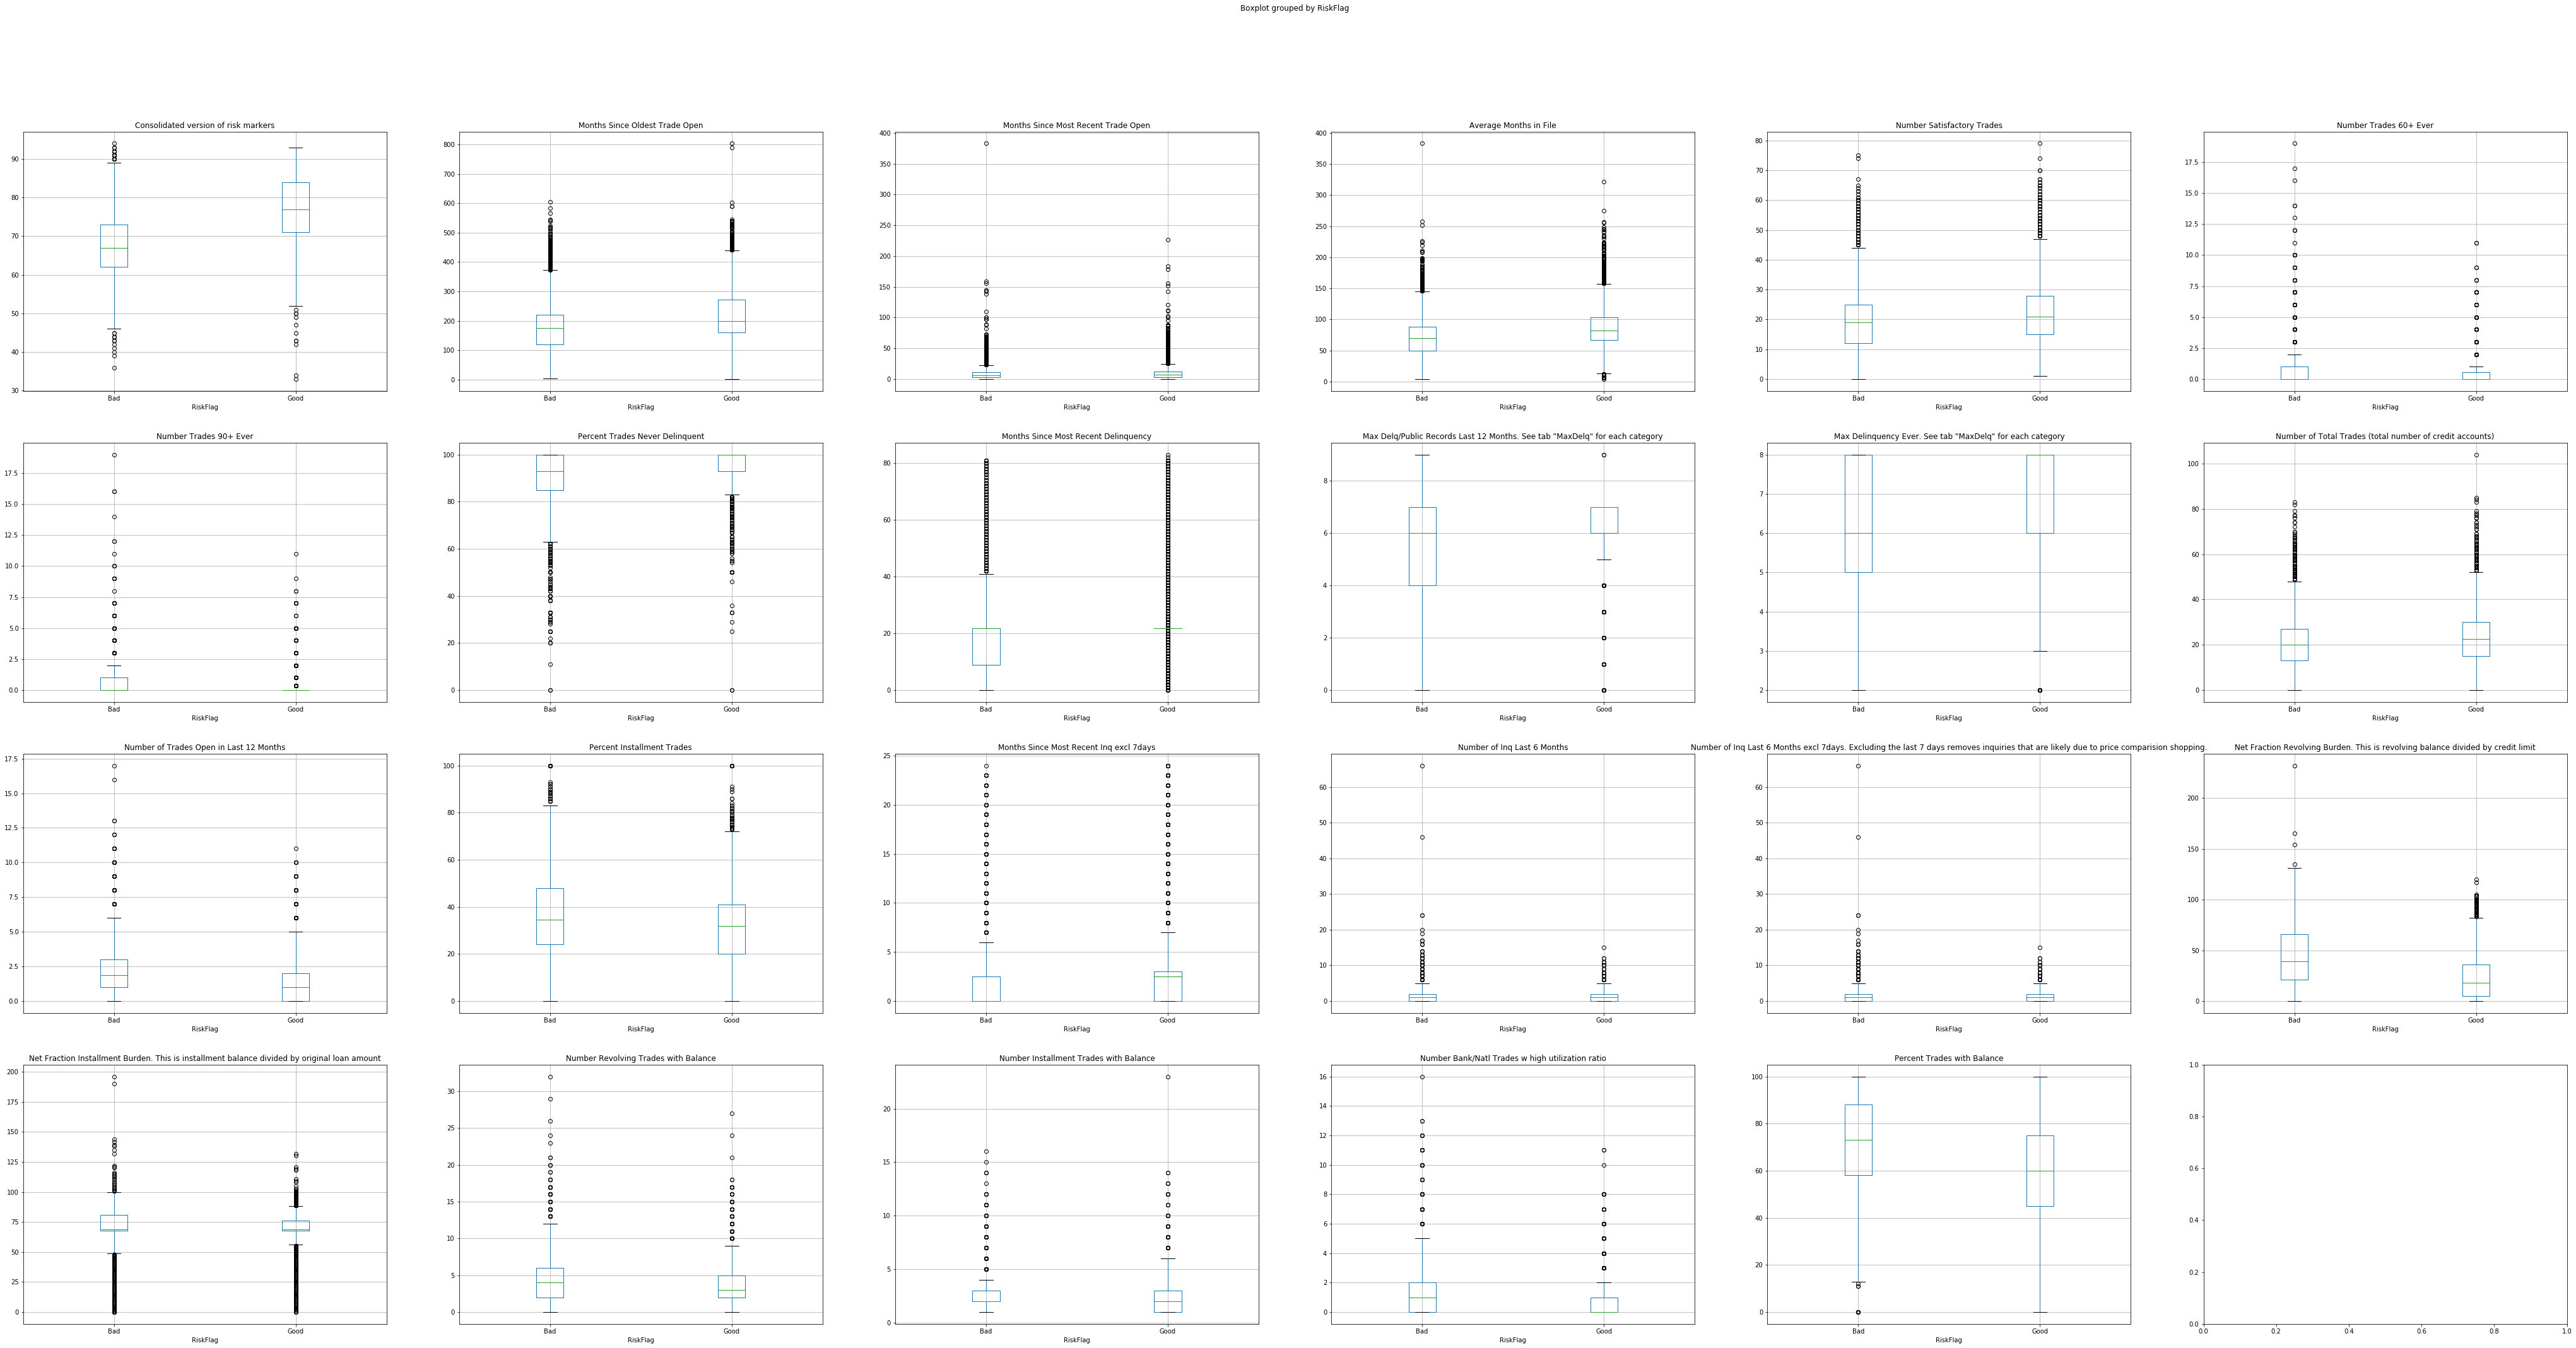

In [7]:
fig, axs = plt.subplots(4, 6)
fig.set_size_inches(70, 35)
k = 1
for i in range(4):
    for j in range(6):
        if k <= 23:
            temp = var + str(k)
            df_train.boxplot(column=temp,by='RiskFlag',ax=axs[i, j])
            axs[i, j].set_title(df2['Description'][k])
            k += 1
fig.show()
fig.savefig('variables.png')

## Helper function and Data preperation

In [131]:
def genIndex(x):
    return [i for i in range(x)]


def prepareData(train, test):
    # training data
    X_train = train.iloc[:, 1:24]
    X_train['index'] = genIndex(X_train.shape[0])
    X_train = X_train.set_index('index')
    y_train = train.iloc[:, 0:1]
    y_train['index'] = genIndex(y_train.shape[0])
    y_train = y_train.set_index('index')
    y_train['RiskFlag'] = y_train['RiskFlag'].replace('Good', 1)
    y_train['RiskFlag'] = y_train['RiskFlag'].replace('Bad', 0)
    
    # testing data 
    X_test = test.iloc[:, 1:24]
    X_test['index'] = genIndex(X_test.shape[0])
    X_test = X_test.set_index('index')
    y_test = test.iloc[:, 0:1]
    y_test['index'] = genIndex(y_test.shape[0])
    y_test = y_test.set_index('index')
    y_test['RiskFlag'] = y_test['RiskFlag'].replace('Good', 1)
    y_test['RiskFlag'] = y_test['RiskFlag'].replace('Bad', 0)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = prepareData(df_train, df_test)

## Wald test 

In [132]:
X1 = sm.add_constant(X_train)
logreg = sm.Logit(y_train,X1).fit()
summary = logreg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.548996
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RiskFlag   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8343
Method:                           MLE   Df Model:                           23
Date:                Wed, 09 Oct 2019   Pseudo R-squ.:                  0.2069
Time:                        11:37:36   Log-Likelihood:                -4593.5
converged:                       True   LL-Null:                       -5791.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4746      0.458    -14.136      0.000      -7.372      -5.577
x1             0.0491      0.

## Functions to understand statistical significance of variables

In [134]:
LRresult = logreg.summary2().tables[1]
print(LRresult.sort_values(by='z'))
print('\n')
print(LRresult.sort_values(by='P>|z|'))
print('\n')
LRresult = LRresult.rename(columns={"P>|z|": "P"})
print(LRresult[abs(LRresult.z)>4])
print('\n')
print(LRresult[LRresult.P < 0.0001])

          Coef.  Std.Err.          z         P>|z|    [0.025    0.975]
const -6.474559  0.458030 -14.135667  2.289555e-45 -7.372281 -5.576837
x18   -0.009632  0.001641  -5.871248  4.325274e-09 -0.012847 -0.006417
x14   -0.008526  0.001949  -4.373897  1.220482e-05 -0.012347 -0.004706
x22   -0.121963  0.028494  -4.280319  1.866259e-05 -0.177810 -0.066116
x16   -0.434144  0.105364  -4.120408  3.782020e-05 -0.640655 -0.227634
x20   -0.059359  0.014849  -3.997642  6.397669e-05 -0.088462 -0.030257
x3    -0.006336  0.002531  -2.503202  1.230753e-02 -0.011297 -0.001375
x13   -0.028946  0.018554  -1.560069  1.187435e-01 -0.065311  0.007420
x19   -0.002044  0.001390  -1.469896  1.415900e-01 -0.004769  0.000681
x7    -0.039173  0.063768  -0.614299  5.390175e-01 -0.164156  0.085810
x12   -0.000555  0.003991  -0.139101  8.893700e-01 -0.008377  0.007267
x21    0.010696  0.020260   0.527934  5.975450e-01 -0.029013  0.050406
x6     0.045204  0.057274   0.789254  4.299638e-01 -0.067052  0.157459
x11   

## Variable choices 
For the variables, I decided to consider 4 factors:-
1. P > |z|
2. z
3. Missing data
4. Box-plot inference


## Inference

1. **P > |z|**: For this factor, the aim was to select the variables with the minimum P > |z|, which implies that the probability of exceeding the critical value is very low, implying that the null hypothesis is strongly accepted. For this factor, I considered a threshold of below 0.0001
2. **z**: For this factor, the aim was to select the variables with the maximum z score, which implies that the z values are well-defined. For this factor, I considered a threshold of above 4
3. **Missing Data**: This factor was the least important and helped with initial elimination of variables with high frequency of missing data, i.e. 9 and 19. Even though x15 had a high frequency of missing data, the other statistics related to it were statistically significant
4. **Box-plot Inference**: The box plot diagram for the different variables were used for validation of my hypothesis. I looked at the relative mean, median and outliers for the plots of Good and Bad for each variable and checked how closely they matched. The close matching of these variables implied that my hypothesis was valid

Interestingly, both of these factors (P > |z|, z) gave me similar results, i.e. 9/10 matching variables

## Process 

- The first step was to create a dataframe of the Logit regression results above, by calling the function in the cell below: logreg.summary2().tables[1]
- Next, I sorted the dataframe independently by these factors (P > |z|, z), and looked at the top performing variables
- Additionally, I set thresholds for the variables to filter out variables that met my criteria
- Finally, I tested various combinations of variables that met my threshold conditions. Upon doing this I found x14 to work better than x4.

## Variable importance 

The order of importance of variables in descending order is:-
1. x1
2. x15
3. x5
4. x14
5. x18


## Selecting the top 5 features

In [135]:
X_train = X_train[['x1', 'x5', 'x14', 'x15', 'x18']]
X_test = X_test[['x1', 'x5', 'x14', 'x15', 'x18']]

## Fitting the model 

In [136]:
logreg = LogisticRegression(C=1e9, solver='newton-cg')
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
print("Coefficients :", np.round(logreg.intercept_,4), np.round(logreg.coef_,4))

Coefficients : [-7.3479] [[ 0.0961  0.0288 -0.0053  0.0618 -0.0078]]


## Accuracy score 

In [137]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on the training set =', np.round(accuracy_train,4))
print('Accuracy on the test set =', np.round(accuracy_test,4))

Accuracy on the training set = 0.7193
Accuracy on the test set = 0.7098


## Classification report

In [138]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1092
           1       0.73      0.61      0.67      1000

    accuracy                           0.71      2092
   macro avg       0.71      0.71      0.71      2092
weighted avg       0.71      0.71      0.71      2092



## Confusion matrix

In [139]:
print(confusion_matrix(y_test, y_pred_test).T)

[[870 385]
 [222 615]]


## Interpreting the model 

From the looks of the coefficients and prediction accuracy, it appears that the **bias is high** and **prediction accuracy is low** and this may imply that the model is **underfitted.** 